<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/Arima_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-07-05 14:09:06--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-07-05 14:09:06 (22.7 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.1 MB/s eta 0:00:00


In [5]:
df = pd.read_csv('airline_passengers.csv' , index_col= 'Month' , parse_dates= True)
df['log_passengers'] = np.log(df['Passengers'])

In [6]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [8]:
import pmdarima as pm
model = pm.auto_arima(train['Passengers'] ,
                      trace = True,
                      suppress_warnings= True,
                      seasonal = True,
                      m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.23 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.98 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.34 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.65 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.16 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.46 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Wed, 05 Jul 2023   AIC                            905.686
Time:                                    14:15:28   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
test_pred , conf_int = model.predict(n_periods= Ntest , return_conf_int= True)

In [18]:
print(type(test_pred))

<class 'pandas.core.series.Series'>


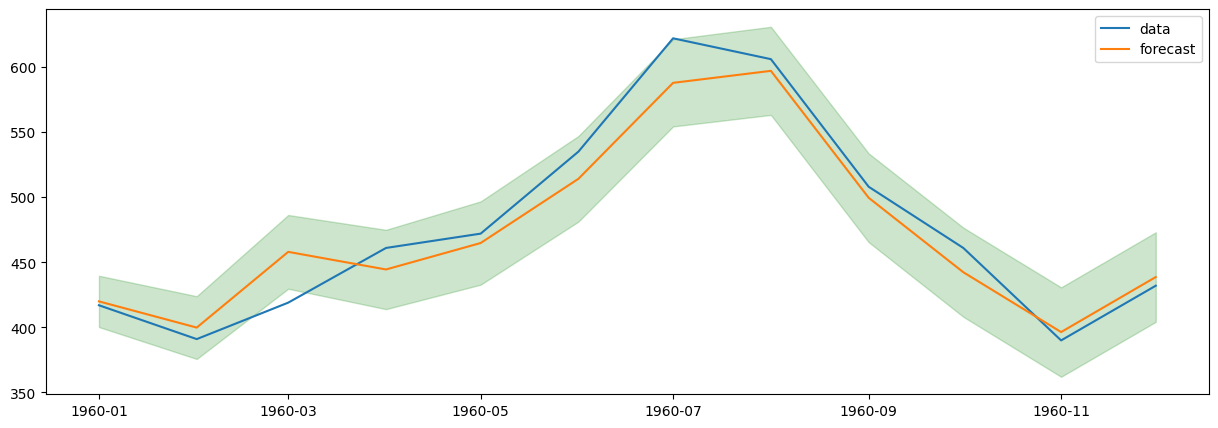

In [21]:
fig , ax = plt.subplots(figsize = (15,5))
ax.plot(test.index , test['Passengers'] , label = 'data')
ax.plot(test.index , test_pred , label = 'forecast')
ax.fill_between(test.index,
                conf_int[:,0],
                conf_int[:,1],
                color = 'green',
                alpha = 0.2)

ax.legend()

In [22]:
train_pred = model.predict_in_sample(start = 0 , end = -1)

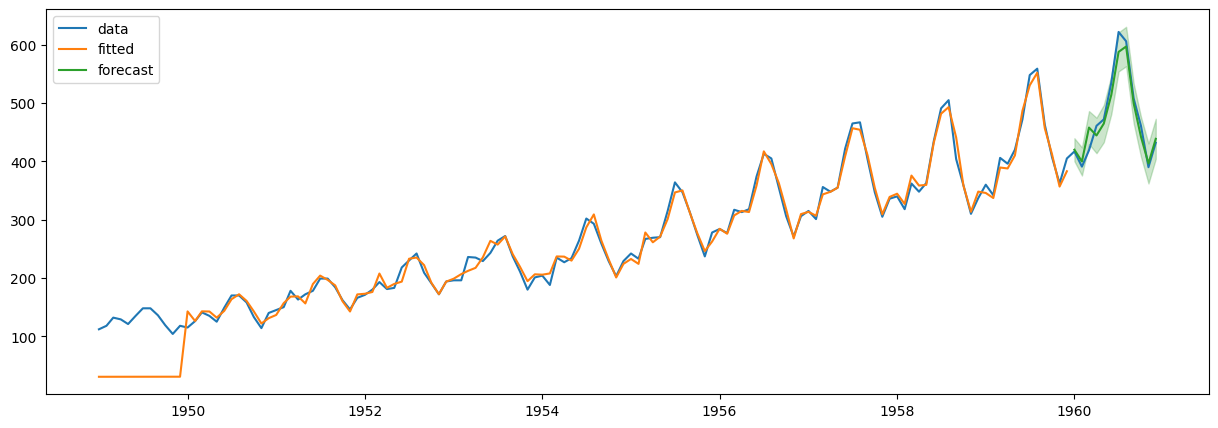

In [25]:
fig , ax = plt.subplots(figsize = (15,5))
ax.plot(df.index , df['Passengers'] , label = 'data')
ax.plot(train.index ,
        train_pred ,
        label = 'fitted')
ax.plot(test.index , test_pred , label = 'forecast')
ax.fill_between(test.index,
                conf_int[:,0],
                conf_int[:,1],
                color = 'green',
                alpha = 0.2)

ax.legend()

In [27]:
log_model = pm.auto_arima(train['log_passengers'] ,
                      trace = True,
                      suppress_warnings= True,
                      seasonal = True,
                      m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.293, Time=3.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=2.19 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.96 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=6.43 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=2.50 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.24 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.571, Time=2.06 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.97 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.041, Time=3.59 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.327, Time=3.62 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [28]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Wed, 05 Jul 2023   AIC                           -448.052
Time:                                      14:29:11   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0194      0.009      2.164      0.030       0.002       0.037
ar.L1          0.5992      0.083      7.251      0.000       0.437       0.761
ar.L2          0.2418      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.413      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.188      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.13
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
log_test_pred , log_conf_int = log_model.predict(n_periods= Ntest , return_conf_int= True)

In [33]:
def rmse(t , y):
  return np.sqrt(np.mean((t-y)**2))

In [36]:
print('RMSE: ', rmse(test['Passengers'] , test_pred))
print('Log RMSE: ', rmse(test['Passengers'] , np.exp(log_test_pred)))

RMSE:  18.536468798006823
Log RMSE:  23.06076576973839


In [53]:
############# No SARIMAX just ARIMA ##################################
model = pm.auto_arima(train['log_passengers'],
                       trace = True,
                      #  suppress_warnings = True,
                       max_p = 12,
                       max_q = 2,
                       max_order = 14,
                       stepwise = False,
                       seasonal = False
                       )

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.300, Time=0.54 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-250.908, Time=0.62 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 226.908
Date:                Wed, 05 Jul 2023   AIC                           -423.816
Time:                        14:52:25   BIC                           -380.688
Sample:                    01-01-1949   HQIC                          -406.292
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0064      0.006      1.146      0.252      -0.005       0.017
ar.L1          0.0252      0.085      0.296      0.767      -0.142       0.192
ar.L2         -0.0760      0.067     -1.141      0.254      -0.206       0.054
ar.L3         -0.0269      0.065     -0.417      0.677      -0.153       0.100
ar.L4         -0.1027      0.069     -1.488      0.137      -0.238       0.033
ar.L5          0.0083      0.063      0.132      0.895      -0.115       0.132
ar.L6         -0.0551      0.065     -0.847      0.397      -0.183       0.072
ar.L7         -0.0435      0.070     -0.625      0.532      -0.180       0.093
ar.L8         -0.1127      0.064     -1.756      0.079      -0.239       0.013
ar.L9         -0.0013      0.075     -0.017      0.986      -0.149       0.146
ar.L10        -0.0675      0.063     -1.073      0.283      -0.191       0.056
ar.L11         0.0085      0.069      0.122      0.903      -0.127       0.144
ar.L12         0.8064      0.060     13.375      0.000       0.688       0.925
ma.L1         -0.3653      0.119     -3.072      0.002      -0.598      -0.132
sigma2         0.0016      0.000      7.191      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.96   Prob(JB):                         0.32
Heteroskedasticity (H):               0.37   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

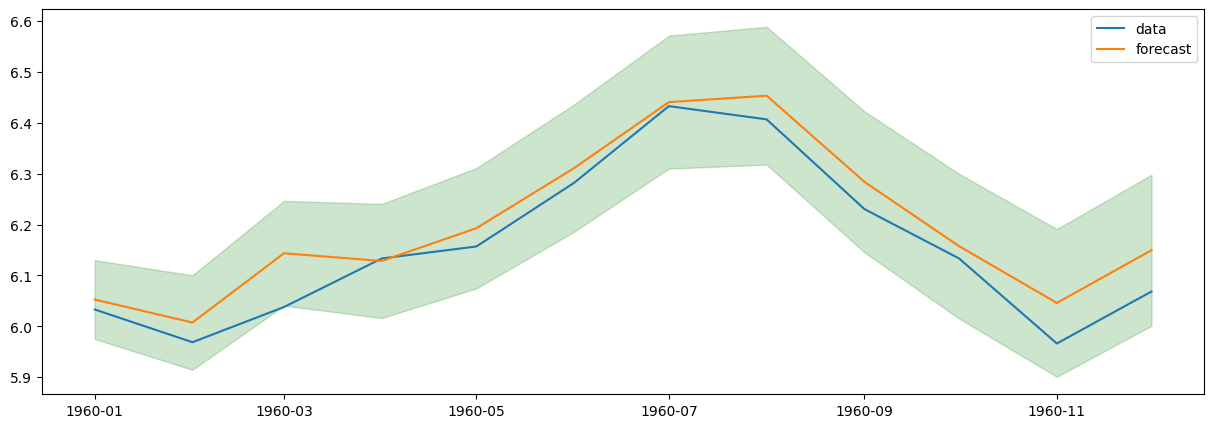

In [55]:
test_pred , conf_int = model.predict(n_periods= Ntest , return_conf_int= True)
fig , ax = plt.subplots(figsize = (15,5))
ax.plot(test.index , test['log_passengers'] , label = 'data')
ax.plot(test.index , test_pred , label = 'forecast')
ax.fill_between(test.index,
                conf_int[:,0],
                conf_int[:,1],
                color = 'green',
                alpha = 0.2)

ax.legend()

In [56]:
print('Log RMSE: ', rmse(test['Passengers'] , np.exp(test_pred)))

Log RMSE:  24.481114723729753
